In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
#Upload and show data (r in front of the windows path)
ski_data = pd.read_csv(r'C:\Users\Martin\Desktop\casa\DataScienceGuidedCapstone\raw_data\ski_resort_data.csv')
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [5]:
#summary of data
ski_data.info

<bound method DataFrame.info of                                   Name   Region    state  summit_elev  \
0                       Alyeska Resort   Alaska   Alaska         3939   
1                  Eaglecrest Ski Area   Alaska   Alaska         2600   
2                     Hilltop Ski Area   Alaska   Alaska         2090   
3                     Arizona Snowbowl  Arizona  Arizona        11500   
4                  Sunrise Park Resort  Arizona  Arizona        11100   
..                                 ...      ...      ...          ...   
325               Meadowlark Ski Lodge  Wyoming  Wyoming         9500   
326          Sleeping Giant Ski Resort  Wyoming  Wyoming         7428   
327                   Snow King Resort  Wyoming  Wyoming         7808   
328  Snowy Range Ski & Recreation Area  Wyoming  Wyoming         9663   
329                White Pine Ski Area  Wyoming  Wyoming         9500   

     vertical_drop  base_elev  trams  fastEight  fastSixes  fastQuads  ...  \
0            

In [6]:
# isolate row for our ski resort and transpose it 
ski_data[ski_data['Name']== 'Big Mountain Resort'].T

,151
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastEight,0
fastSixes,0
fastQuads,3


In [7]:
#counting missing values x column and sorting them 
missing = pd.DataFrame({'count_na' : ski_data.isna().sum(),'na_%' : 100*ski_data.isna().sum()/len(ski_data['Name'])})

In [8]:
missing.sort_values(by='na_%', ascending=False)

,count_na,na_%
fastEight,166,50.303030
NightSkiing_ac,143,43.333333
AdultWeekday,54,16.363636
AdultWeekend,51,15.454545
daysOpenLastYear,51,15.454545
TerrainParks,51,15.454545
projectedDaysOpen,47,14.242424
Snow Making_ac,46,13.939394
averageSnowfall,14,4.242424
LongestRun_mi,5,1.515152


In [9]:
#see if there are any outliers in critical columns 
ski_data['AdultWeekday'].describe()
#ski_data['AdultWeekend'].describe()
#ski_data['projectedDaysOpen'].describe()
#ski_data['total_chairs'].describe()
##  There are appears to be no outliers or bad entries to worry about

count    276.000000
mean      57.916957
std       26.140126
min       15.000000
25%       40.000000
50%       50.000000
75%       71.000000
max      179.000000
Name: AdultWeekday, dtype: float64

In [10]:
ski_data.select_dtypes('object')

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona
...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming
326,Sleeping Giant Ski Resort,Wyoming,Wyoming
327,Snow King Resort,Wyoming,Wyoming
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming


In [11]:
#see if all names are unique .. value_counts already sorted in decending 
ski_data['Name'].value_counts().head()

Crystal Mountain       2
Whitecap Mountain      1
Tamarack Resort        1
Giants Ridge Resort    1
Montana Snowbowl       1
Name: Name, dtype: int64

In [12]:
# still duplicate if you do a name + state combo? *auto sorted decending
(ski_data['Name'] + ',' + ski_data['state']).value_counts().head()

Mount Sunapee,New Hampshire               1
Mt. Abram Ski Resort,Maine                1
Snowshoe Mountain Resort,West Virginia    1
Hilltop Ski Area,Alaska                   1
Mt. Holiday Ski Area,Michigan             1
dtype: int64

In [73]:
ski_data[ski_data['Name'] == 'Crystal Mountain']

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
104,Crystal Mountain,Michigan,Michigan,1132,375,757,0,0.0,0,1,...,0.3,102.0,96.0,120.0,63.0,132.0,54.0,64.0,135.0,56.0
295,Crystal Mountain,Washington,Washington,7012,3100,4400,1,NaN,2,2,...,2.5,2600.0,10.0,NaN,57.0,486.0,99.0,99.0,NaN,NaN


In [79]:
# how many times does region not match state 
(ski_data.Region != ski_data.state).sum()

33

In [82]:
# how many resorts in each region 
ski_data['Region'].value_counts()

New York               33
Michigan               29
Sierra Nevada          22
Colorado               22
Pennsylvania           19
New Hampshire          16
Wisconsin              16
Vermont                15
Minnesota              14
Montana                12
Idaho                  12
Massachusetts          11
Washington             10
New Mexico              9
Maine                   9
Wyoming                 8
Utah                    7
Salt Lake City          6
North Carolina          6
Oregon                  6
Ohio                    5
Connecticut             5
West Virginia           4
Virginia                4
Mt. Hood                4
Illinois                4
Iowa                    3
Alaska                  3
Indiana                 2
New Jersey              2
South Dakota            2
Arizona                 2
Missouri                2
Nevada                  2
Tennessee               1
Rhode Island            1
Maryland                1
Northern California     1
Name: Region

In [103]:
#inspect rows where region and state dont match
ski_data[ski_data.state != ski_data.Region][['state','Region']].value_counts() #.groupby(by='state')
#ski_data[ski_data.state != ski_data.Region]['Region'].value_counts()

state       Region             
California  Sierra Nevada          20
Utah        Salt Lake City          6
Oregon      Mt. Hood                4
Nevada      Sierra Nevada           2
California  Northern California     1
dtype: int64

In [104]:
#calculate the number of unique values in each 'state' & 'Region'
ski_data[['state','Region']].nunique()

state     35
Region    38
dtype: int64

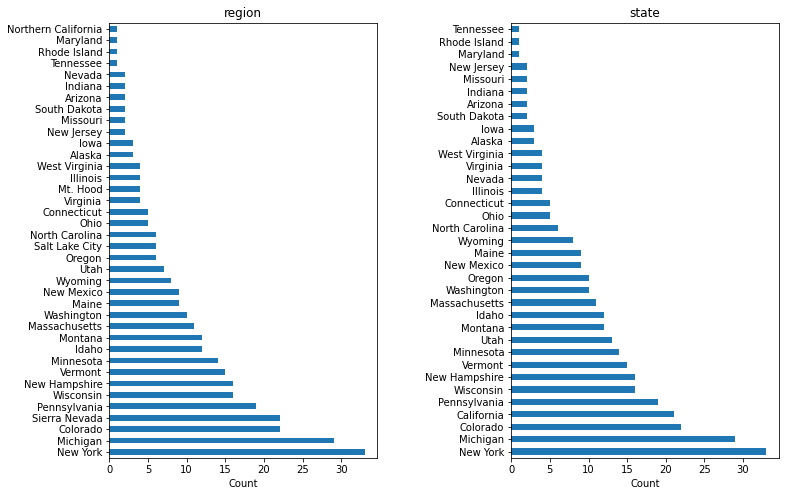

In [13]:
#Code task 13#
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(1, 2, figsize=(12,8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.Region.value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title of 'Region'
ax[0].set_title('region')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ski_data.state.value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'state'
ax[1].set_title('state')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);
#You're encouraged to explore  figure sizes, orientations, and spacing here
# importance of easy-to-read/informative figures is frequently understated
# and you will find the ability to tweak figures invaluable later on

In [14]:
# Calculate average weekday and weekend price by state and sort by the average of the two
# Hint: use the pattern dataframe.groupby(<grouping variable>)[<list of columns>].mean()
state_price_means = ski_data.groupby(by='state')[['AdultWeekday', 'AdultWeekend']].mean()
state_price_means.head()

,AdultWeekday,AdultWeekend
state,,
Alaska,47.333333,57.333333
Arizona,81.500000,83.500000
California,78.214286,81.416667
Colorado,90.714286,90.714286
Connecticut,47.800000,56.800000


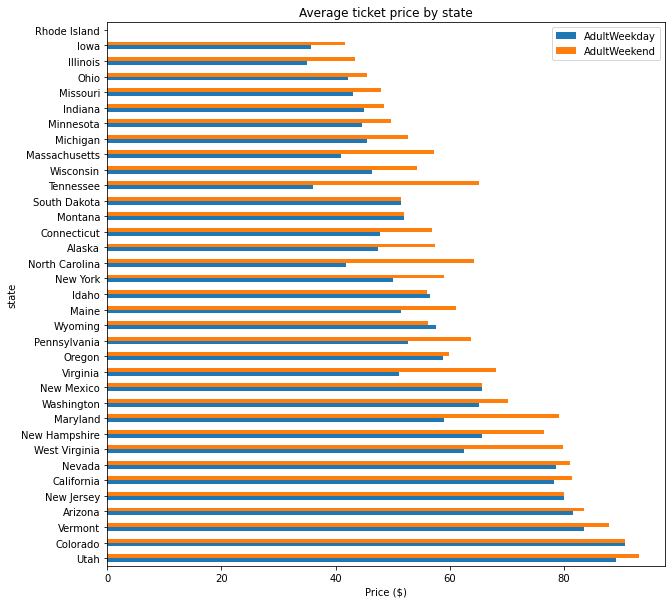

In [15]:
(state_price_means.reindex(index=state_price_means.mean(axis=1)
                           .sort_values(ascending=False)
                           .index)
                           .plot(kind='barh',figsize=(10,10), title='Average ticket price by state'))
plt.xlabel('Price ($)');

In [16]:
#melt price for weekday and weekend into a single column price with a type column week/end
ticket_prices = pd.melt(ski_data[['state','AdultWeekday','AdultWeekend']],
                       id_vars='state',
                       var_name='Ticket',
                       value_vars=['AdultWeekday','AdultWeekend'],
                       value_name='Price')
ticket_prices.head()

,state,Ticket,Price
0,Alaska,AdultWeekday,65.0
1,Alaska,AdultWeekday,47.0
2,Alaska,AdultWeekday,30.0
3,Arizona,AdultWeekday,89.0
4,Arizona,AdultWeekday,74.0


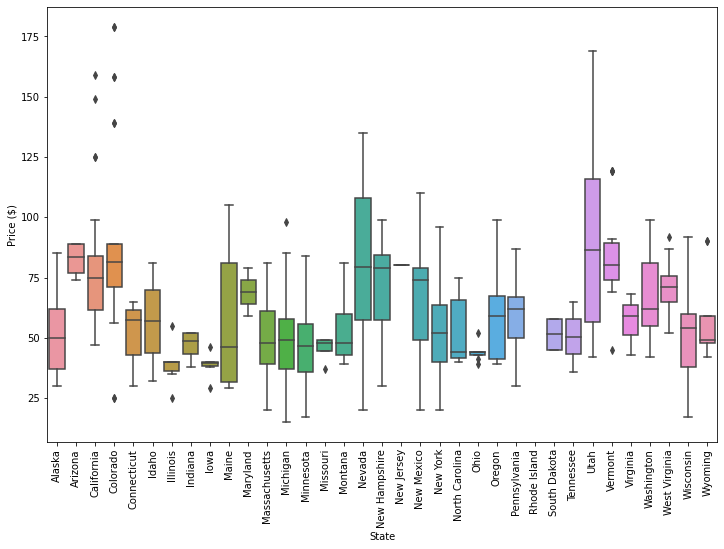

In [17]:
#create seaborn boxplot of above 
plt.subplots(figsize=(12,8))
sns.boxplot(x='state',y='Price',data=ticket_prices)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('State');

In [18]:
## call describe method to see what do with state and prices 
ski_data.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


In [42]:
##drop those record that have no weekday AND weekend prices *sum'axis=1' adds side to side as oppose to up/down
missing_price = ski_data[['AdultWeekday','AdultWeekend']].isnull().sum(axis=1)
#missing_price.value_counts()/len(missing_price)*100
missing_price

0      0
1      0
2      0
3      0
4      0
      ..
325    2
326    0
327    0
328    0
329    1
Length: 328, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

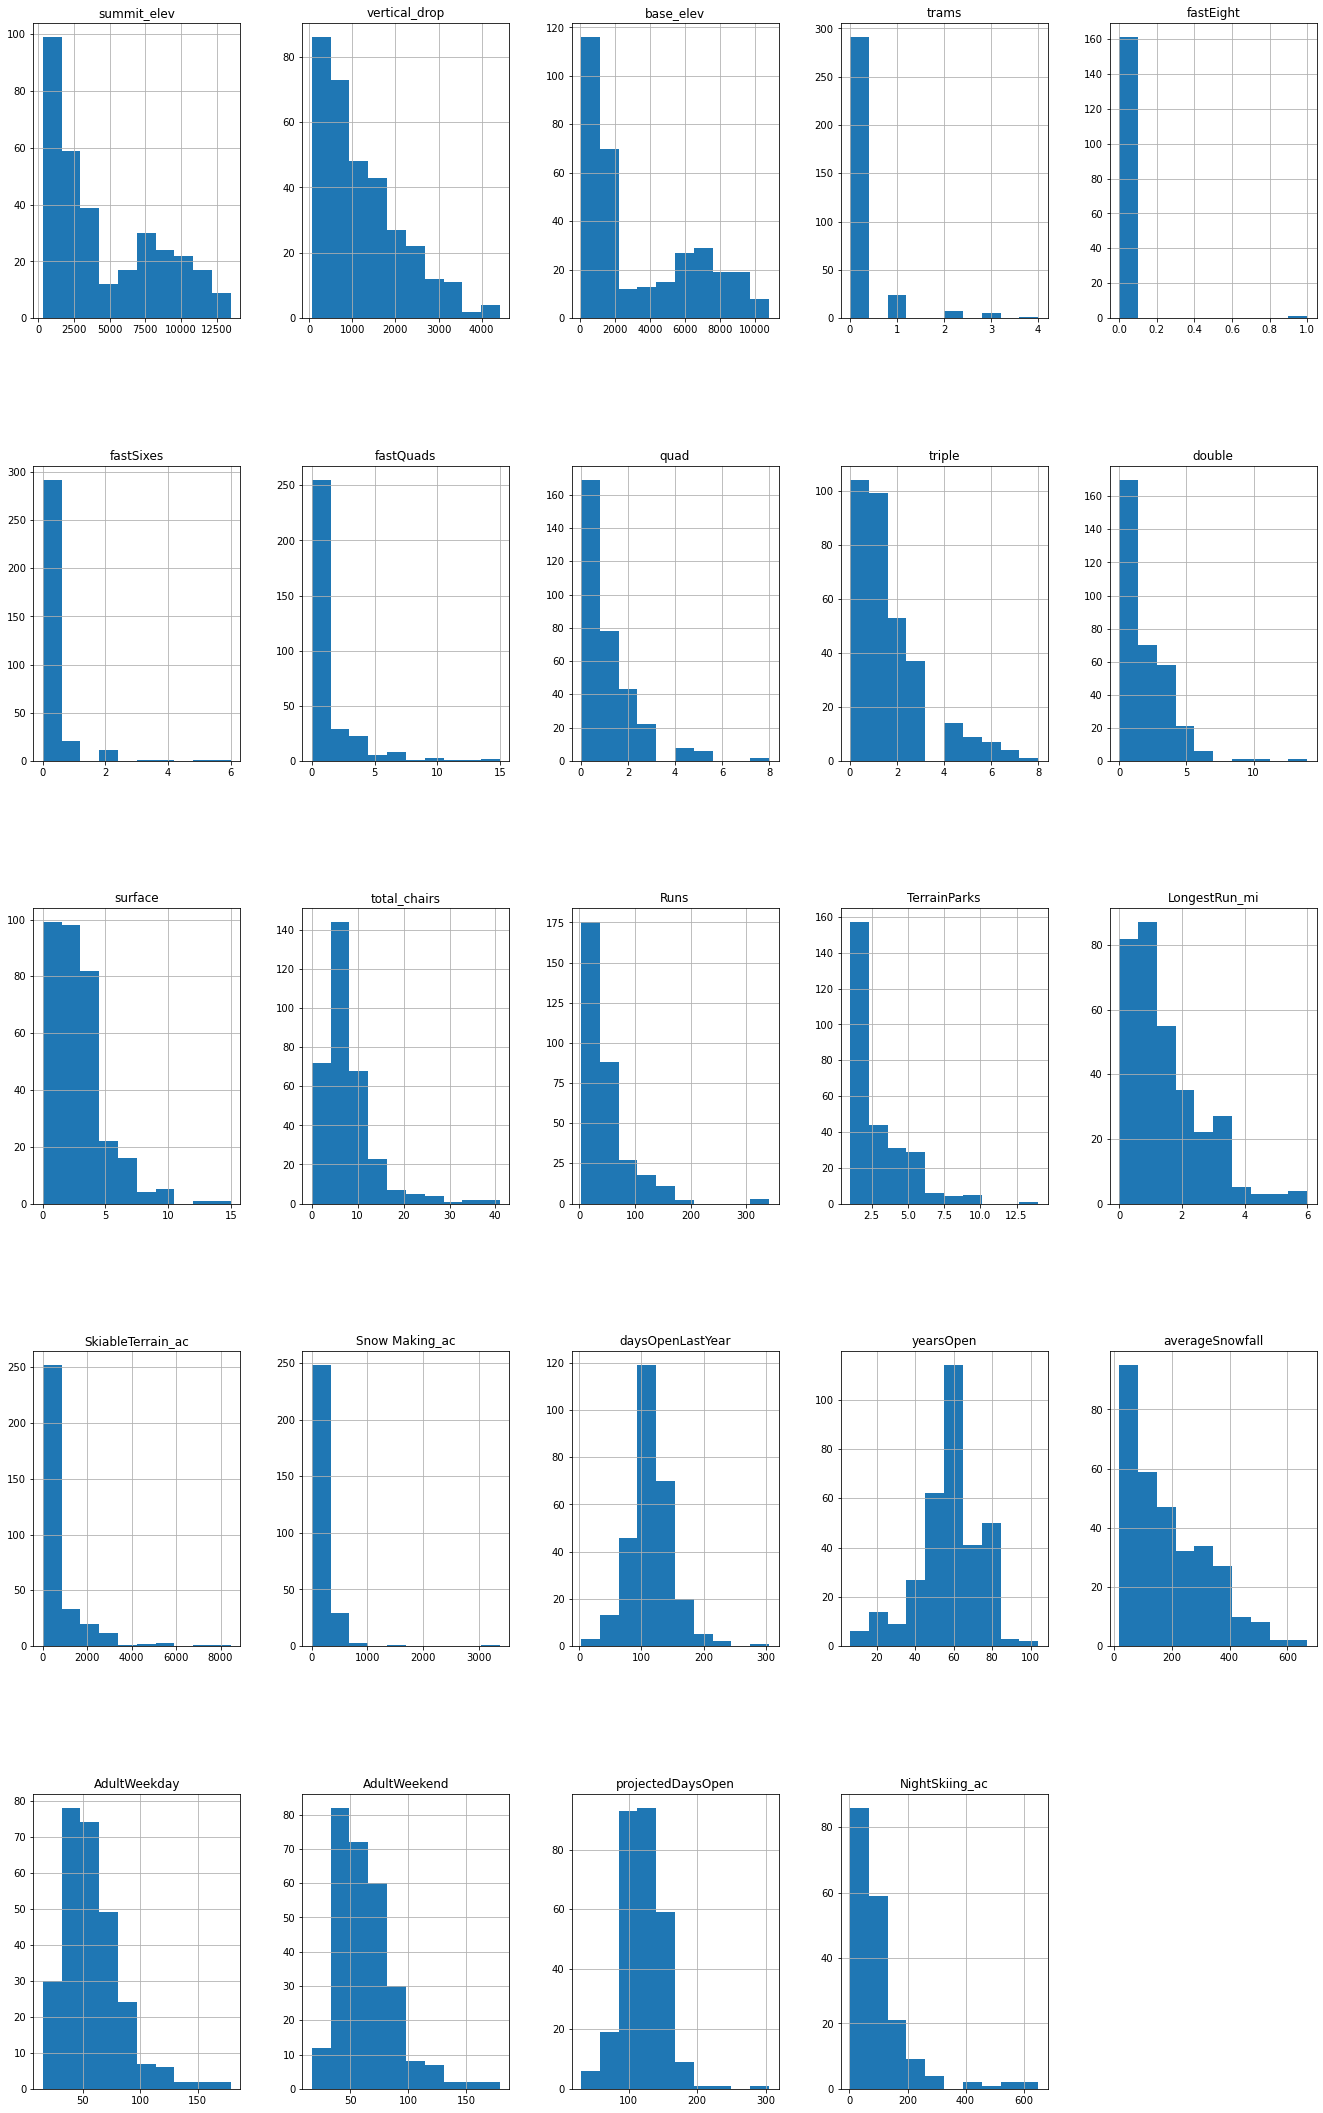

In [43]:
#analyze each column for trouble in data **see years open (obvious input error)
ski_data.hist(figsize=(23,38))
plt.subplots_adjust(hspace=0.5);
plt.show

In [44]:
ski_data.Name[ski_data.SkiableTerrain_ac > 10000].T
#resort below has crazy amount of skiable area

Series([], Name: Name, dtype: object)

In [46]:
ski_data[ski_data.SkiableTerrain_ac > 10000].T
##acording to website the area below is incorrect and it is supposed to 1819
## notice the index is 39

""
Name
Region
state
summit_elev
vertical_drop
base_elev
trams
fastEight
fastSixes
fastQuads


In [22]:
# we are going to goa ahead and change to correct value below and check that it has been changed 
ski_data.loc[39,'SkiableTerrain_ac']=1819.0
ski_data.loc[39,'SkiableTerrain_ac']

1819.0

TypeError: 'str' object is not callable

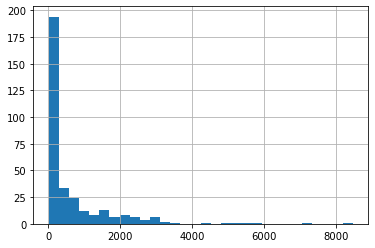

In [47]:
#so now that you fixed that outlier that was incorrect, what does the skiable area look like now
ski_data.SkiableTerrain_ac.hist(bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('count')
plt.title('Skiable area (acres) post-error')

In [48]:
ski_data.SkiableTerrain_ac.describe()

count     325.000000
mean      667.030769
std      1102.336418
min         8.000000
25%        85.000000
50%       200.000000
75%       700.000000
max      8464.000000
Name: SkiableTerrain_ac, dtype: float64

In [49]:
#now we do same process but for snow making machines area covered column 
ski_data[ski_data['Snow Making_ac']>3000].T
#website says that machines cover 60% trails, skiable area is 4800 so *.60=2880
#doesnt match, but instead of changing just leave bc it doesnt have pricing info and we are going to drop

,11
Name,Heavenly Mountain Resort
Region,Sierra Nevada
state,California
summit_elev,10067
vertical_drop,3500
base_elev,7170
trams,2
fastEight,0
fastSixes,2
fastQuads,7


In [50]:
ski_data.fastEight.value_counts()
# There are a ton of value missings and only one resort in all data has one of these so drop column

0.0    161
1.0      1
Name: fastEight, dtype: int64

In [51]:
#ski_data.drop(columns='fastEight',inplace=True)
list(ski_data.columns)

['Name',
 'Region',
 'state',
 'summit_elev',
 'vertical_drop',
 'base_elev',
 'trams',
 'fastEight',
 'fastSixes',
 'fastQuads',
 'quad',
 'triple',
 'double',
 'surface',
 'total_chairs',
 'Runs',
 'TerrainParks',
 'LongestRun_mi',
 'SkiableTerrain_ac',
 'Snow Making_ac',
 'daysOpenLastYear',
 'yearsOpen',
 'averageSnowfall',
 'AdultWeekday',
 'AdultWeekend',
 'projectedDaysOpen',
 'NightSkiing_ac']

In [52]:
ski_data.yearsOpen[ski_data.yearsOpen>100]

34    104.0
Name: yearsOpen, dtype: float64

Text(0.5, 1.0, 'distribution without error of years opened')

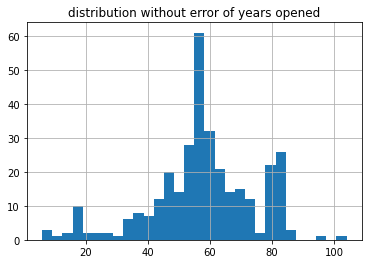

In [53]:
#how does it look without the obvious outlier??
ski_data.yearsOpen[ski_data.yearsOpen<1000].hist(bins=30)
plt.xlabel = 'Years open'
plt.ylabel = 'Count'
plt.title('distribution without error of years opened')


In [54]:
ski_data.yearsOpen[ski_data.yearsOpen<1000].describe()

count    328.000000
mean      57.695122
std       16.841182
min        6.000000
25%       50.000000
50%       58.000000
75%       68.250000
max      104.000000
Name: yearsOpen, dtype: float64

In [55]:
# we are going to drop this 2019 bc fixing will introduce a youngest new resort (current is 6)
ski_data = ski_data[ski_data.yearsOpen <1000]

In [56]:
#create sumary by state
state_summary = ski_data.groupby('state').agg(
    resorts_per_state=pd.NamedAgg(column='Name', aggfunc='size'), #could pick any column here
    state_total_skiable_area_ac=pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
    state_total_days_open=pd.NamedAgg(column='daysOpenLastYear', aggfunc='sum'),
    state_total_terrain_parks=pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
    state_total_nightskiing_ac=pd.NamedAgg(column='NightSkiing_ac', aggfunc='sum')
).reset_index()
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac
0,Alaska,3,2280.0,345.0,2280.0,580.0
1,Arizona,2,1577.0,237.0,1577.0,80.0
2,California,21,25948.0,2738.0,25948.0,587.0
3,Colorado,22,43682.0,3258.0,43682.0,428.0
4,Connecticut,5,358.0,353.0,358.0,256.0


In [57]:
## now we are going to drop the resorts with no price data, we already created missing price list 
## where 2 indicated both weekday and weekend missing 
missing_price.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [58]:
ski_data = ski_data[missing_price != 2]
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


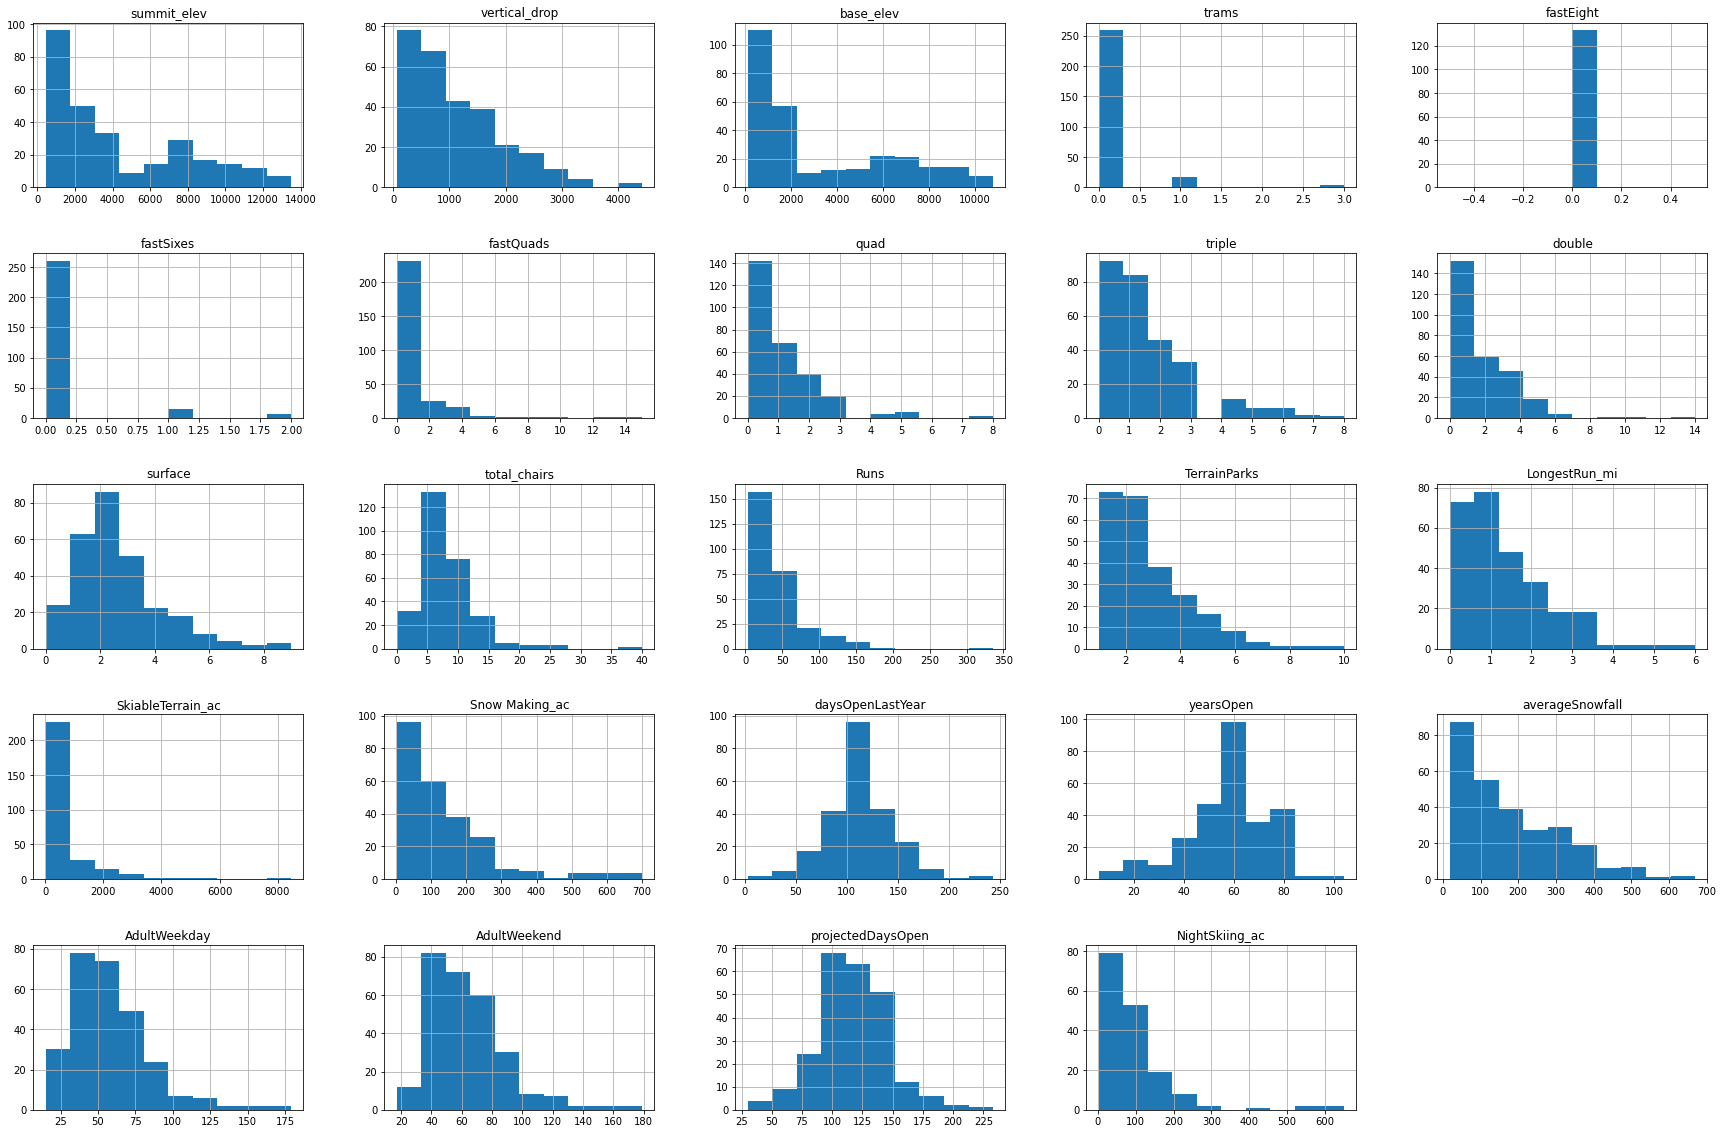

In [59]:
## lets take a look at the columns again after taking those rows out
ski_data.hist(figsize=(30,20))
plt.subplots_adjust(hspace=0.4);

In [60]:
##read_url was not working with 'certificate_verify_failed' so copied into excel and read that 
states_excel = r'C:\Users\Martin\Desktop\casa\US_states_list_wiki.xlsx'
usa_states = pd.read_excel(states_excel)
usa_states.head()

,state,Abrev.,Capital,Largest (by population)[5],Established[A],Population,Total area mi2
0,Alabama,AL,Montgomery,Birmingham,"Dec 14, 1819",4903185,52420
1,Alaska,AK,Juneau,Anchorage,1959-01-03 00:00:00,731545,665384
2,Arizona,AZ,Phoenix,NaN,1912-02-14 00:00:00,7278717,113990
3,Arkansas,AR,Little Rock,NaN,"Jun 15, 1836",3017804,53179
4,California,CA,Sacramento,Los Angeles,"Sep 9, 1850",39512223,163695


In [61]:
#theres a problem with dates after 1900
established = usa_states.iloc[:,4]
established.head()

0           Dec 14, 1819
1    1959-01-03 00:00:00
2    1912-02-14 00:00:00
3           Jun 15, 1836
4            Sep 9, 1850
Name: Established[A], dtype: object

In [62]:
#extract and rename from df w state names and populations
usa_states_sub = usa_states.loc[:,['state','Population','Total area mi2']].copy()
usa_states_sub.columns = ['state','state_population','state_area_sq_miles']
usa_states_sub.head()

,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695


In [63]:
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

{'Alaska',
 'Arizona',
 'California',
 'Colorado',
 'Connecticut',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Missouri',
 'Montana',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'Ohio',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Dakota',
 'Tennessee',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

In [64]:
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20     Massachusetts[C]
37      Pennsylvania[C]
38         Rhode Island
45          Virginia[C]
47        West Virginia
Name: state, dtype: object

In [65]:
#removes the [C] from in front of the state names 
usa_states_sub.state.replace(to_replace='\[.*\]', value="", regex=True, inplace=True)
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20     Massachusetts
37      Pennsylvania
38      Rhode Island
45          Virginia
47     West Virginia
Name: state, dtype: object

In [249]:
##IGnore mistake below ****Fixed after the fact**
#I accidentaly replaced all 'C's out so I had to fix the states that start with C
#usa_states_sub['state'].str.strip()
#usa_states_sub.iloc[[4,5,6],0]=['California','Colorado','Connecticut']

In [66]:
#There's a weird \xa0 that appears when i do sets, it has something to do with spacing, i did a trim i shouldnt have
set(usa_states_sub['state'])

{'Mississippi',
 '\xa0Alabama',
 '\xa0Alaska',
 '\xa0Arizona',
 '\xa0Arkansas',
 '\xa0California',
 '\xa0Colorado',
 '\xa0Connecticut',
 '\xa0Delaware',
 '\xa0Florida',
 '\xa0Georgia',
 '\xa0Hawaii',
 '\xa0Idaho',
 '\xa0Illinois',
 '\xa0Indiana',
 '\xa0Iowa',
 '\xa0Kansas',
 '\xa0Kentucky',
 '\xa0Louisiana',
 '\xa0Maine',
 '\xa0Maryland',
 '\xa0Massachusetts',
 '\xa0Michigan',
 '\xa0Minnesota',
 '\xa0Missouri',
 '\xa0Montana',
 '\xa0Nebraska',
 '\xa0Nevada',
 '\xa0New Hampshire',
 '\xa0New Jersey',
 '\xa0New Mexico',
 '\xa0New York',
 '\xa0North Carolina',
 '\xa0North Dakota',
 '\xa0Ohio',
 '\xa0Oklahoma',
 '\xa0Oregon',
 '\xa0Pennsylvania',
 '\xa0Rhode Island',
 '\xa0South Carolina',
 '\xa0South Dakota',
 '\xa0Tennessee',
 '\xa0Texas',
 '\xa0Utah',
 '\xa0Vermont',
 '\xa0Virginia',
 '\xa0Washington',
 '\xa0West Virginia',
 '\xa0Wisconsin',
 '\xa0Wyoming'}

In [67]:
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

{'Alaska',
 'Arizona',
 'California',
 'Colorado',
 'Connecticut',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Missouri',
 'Montana',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'Ohio',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Dakota',
 'Tennessee',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

<AxesSubplot:xlabel='AdultWeekday', ylabel='AdultWeekend'>

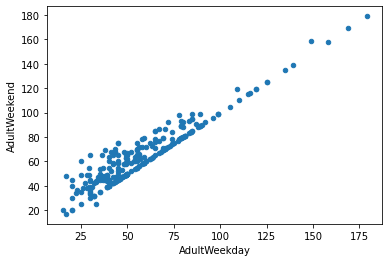

In [68]:
#relationship between  weekday and weekend 
ski_data.plot(x='AdultWeekday', y='AdultWeekend',kind='scatter')


In [69]:
#same relationship but only for montana 
ski_data.loc[ski_data.state == 'Montana',['state','AdultWeekday','AdultWeekend']]

,state,AdultWeekday,AdultWeekend
141,Montana,42.0,42.0
142,Montana,63.0,63.0
143,Montana,49.0,49.0
144,Montana,48.0,48.0
145,Montana,46.0,46.0
146,Montana,39.0,39.0
147,Montana,50.0,50.0
148,Montana,67.0,67.0
149,Montana,47.0,47.0
150,Montana,39.0,39.0


In [70]:
#is there any reason to prefer weekend or weekday prices? which is missing the least?
#weekend prices have the least missing values of the two, so drop weekday prices
ski_data[['AdultWeekend','AdultWeekday']].isnull().sum()

AdultWeekend    4
AdultWeekday    7
dtype: int64

In [71]:
#dropping weekday prices column entirely and na rows for weekend prices 
ski_data.drop(columns='AdultWeekday', inplace=True)
ski_data.dropna(subset=['AdultWeekend'],inplace=True)

In [72]:
#no more weekday price
ski_data.columns

Index(['Name', 'Region', 'state', 'summit_elev', 'vertical_drop', 'base_elev',
       'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple',
       'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekend',
       'projectedDaysOpen', 'NightSkiing_ac'],
      dtype='object')

In [73]:
#no more weekend na rows
ski_data.AdultWeekend.isna().sum()

0

In [75]:
# % missing values by row
missing = pd.concat([ski_data.isnull().sum(axis=1),ski_data.isnull().mean(axis=1)],axis=1)
missing.columns = ['count','%']
missing.sort_values(by='count',ascending=False).head(10)

,count,%
329,6,0.230769
141,6,0.230769
62,6,0.230769
74,6,0.230769
146,6,0.230769
204,5,0.192308
88,5,0.192308
86,5,0.192308
55,5,0.192308
184,5,0.192308


In [76]:
missing['%'].unique()

array([0.        , 0.03846154, 0.07692308, 0.11538462, 0.15384615,
       0.19230769, 0.23076923])

In [280]:
#This is almost as if values have been removed artificially... no need to drop at this time
#before knowing importance of columns
missing['%'].value_counts()

0.00    107
0.04     94
0.08     45
0.12     15
0.16     10
0.20      6
Name: %, dtype: int64

In [281]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

In [286]:
#saving the two df's
ski_data.to_csv(r'C:\Users\Martin\Desktop\casa\DataScienceGuidedCapstone\ski_data_cleaned.csv')

In [288]:
state_summary.to_csv(r'C:\Users\Martin\Desktop\casa\DataScienceGuidedCapstone\state_summary.csv')

In [ ]:
## the major changes to the original dataset is that we have taken out columns that had little to no info
# or that were redundant like fasteight and weekday prices, also we took out the NaN rows for weekend prices
#because they wouldnt be helpful in an analysis for prices BUT
# we did state wide analysis like mean price pers state before taking out the rows. 
# Also: checked region state relationship, looked histogram of all columns for outliers
#End result is two new csv files, with the 
#cleaned original file and the state wide analysis file 